# Pair Programming EDA

Para los ejercicios de pair programming de Regresión logística temdremos que buscar un dataset (al igual que hicismos en regresión lineal) que usaremosmos a lo largo de los siguientes ejercicios.

- Buscar un conjunto de datos a analizar

- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado

- Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.

- Interpretación de los resultados.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

import sys
sys.path.append("../../")
from src import funciones as fun
from src import variables as var

In [58]:
#df_prueba = pd.read_csv("../archivos/telco_customer_churn.csv", na_values= ' ')
#es posible aplicar esta estrategia con nan en formato diferente al habitual, aunque para este proyecto hemos utilizado unas estrategias diferentes.

In [2]:
df = pd.read_csv("../archivos/telco_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
nomcol = {col: col.lower() for col in df.columns} #homogeneizamos las columnas

In [61]:
df.rename(columns = nomcol, inplace=True) #las renombramos

In [62]:
df.head() #comprobamos si se hicieron los cambios

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## *Elegimos 'churn' como variable respuesta.*

In [63]:
fun.exploracion(df) #función para explorar el dataframe

.............................................
En el dataframe hay 7043 filas y 21 columnas.
.............................................
5 filas aleatorias:


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
368,9571-EDEBV,Male,0,Yes,No,71,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),98.65,6962.85,No
1967,0565-IYCGT,Male,0,No,No,69,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),78.60,5356.45,Yes
6158,3845-FXCYS,Male,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.65,31.2,No
2930,5322-ZSMZY,Male,0,Yes,Yes,31,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,755.6,No
4806,6729-FZWSY,Male,0,No,No,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.45,1195.95,No


.............................................
Los tipos de data por columna del dataframe son:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
index,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,object,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,object,object


.............................................
La cantidad de nulos por columna del dataframe son:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
index,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


.............................................
El porcentaje de nulos por columna del dataframe son:


customerid          0.0
gender              0.0
seniorcitizen       0.0
partner             0.0
dependents          0.0
tenure              0.0
phoneservice        0.0
multiplelines       0.0
internetservice     0.0
onlinesecurity      0.0
onlinebackup        0.0
deviceprotection    0.0
techsupport         0.0
streamingtv         0.0
streamingmovies     0.0
contract            0.0
paperlessbilling    0.0
paymentmethod       0.0
monthlycharges      0.0
totalcharges        0.0
churn               0.0
dtype: float64

.............................................
No hay filas duplicadas.
.............................................
Los principales estadísticos de las columnas numéricas son:


,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


.............................................
Los principales estadísticos de las columnas categóricas son:


,customerid,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,totalcharges,churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


.............................................


Tenemos dos variables que no están el el tipo correcto:

- 'seniorcitizen' es una variable que se comporta como categórica aunque sea numérica

- 'totalcharges' es una variable que necesitaba estar en tipo float

In [64]:
df['seniorcitizen'] = df['seniorcitizen'].astype('category')

In [65]:
df = df.drop(df[df['totalcharges']==' '].index)

In [66]:
df['totalcharges'] = df['totalcharges'].astype('float64')

Advertimos que es posible que las columnas 'streaming' pueden contener datos redundantes

In [67]:
df[['streamingmovies', 'streamingtv']].value_counts()

streamingmovies      streamingtv        
No                   No                     2017
Yes                  Yes                    1939
No internet service  No internet service    1520
Yes                  No                      792
No                   Yes                     764
Name: count, dtype: int64

In [68]:
df['streamingmovies'].value_counts()

streamingmovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64

In [69]:
df['streamingtv'].value_counts()

streamingtv
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64

In [70]:
df.sample(10)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
6287,3223-WZWJM,Male,0,No,No,26,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,83.95,2254.20,Yes
4790,5216-WASFJ,Female,1,Yes,No,31,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.85,2633.40,No
6817,4707-MAXGU,Male,0,Yes,No,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.85,1872.20,No
5796,8571-ZCMCX,Female,0,Yes,Yes,47,No,No phone service,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),60.00,2768.65,No
2371,2712-SYWAY,Female,0,No,No,1,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,25.70,25.70,No
370,6563-VRERX,Male,0,Yes,Yes,33,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.60,690.25,No
5269,5424-RLQLC,Male,0,No,No,10,Yes,No,DSL,No,Yes,No,No,Yes,No,Month-to-month,Yes,Mailed check,59.65,638.95,No
1198,5542-NKVRU,Female,0,No,No,42,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.75,844.45,No
1353,7073-QETQY,Male,0,Yes,Yes,66,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,20.35,1359.50,No
6867,5146-YYFRZ,Male,0,No,No,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1311.75,No


In [71]:
df['contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [72]:
df['streamingtv'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [73]:
df['streamingmovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

Estudiamos las variables y decidimos borrar una de ellas

 Los valores únicos para la variable streamingtv son: ['No', 'Yes', 'No internet service']
 Los valores únicos para la variable streamingmovies son: ['No', 'Yes', 'No internet service']


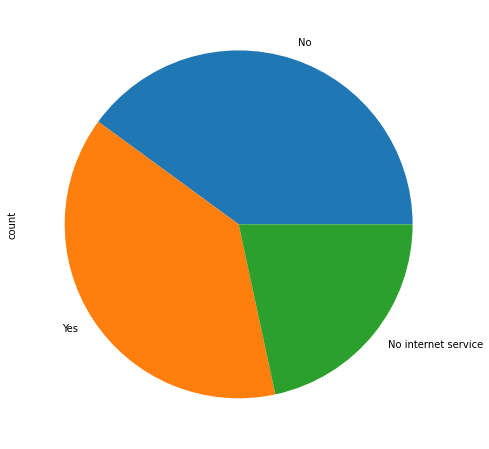

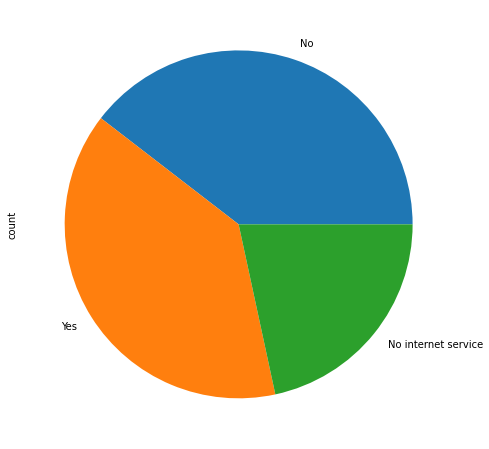

In [74]:
streaminglist = ['streamingtv','streamingmovies']
fun.similar_variables(streaminglist, df) #función que permite extraer valores únicos y compararlos a través de la gráfica
plt.savefig('streamings.png')

In [75]:
df.drop('streamingmovies', axis = 1, inplace=True)

In [76]:
numericas = df.select_dtypes(include=np.number)

In [77]:
mask = np.triu(np.ones_like(numericas.corr(),dtype = np.bool_))

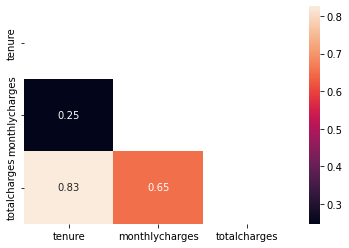

In [78]:
sns.heatmap(numericas.corr(), annot=True, mask=mask)
plt.savefig('correlacion_num.png');

Tras ver las correlaciones de las variables numéricas tomamos la decisión de eliminar 'totalcharges' ya que es la que más se relaciona con las otras dos, y por tanto la que puede estar resultando redundante.

In [79]:
df.drop('totalcharges', axis=1, inplace= True)

In [80]:
categoricas = df.select_dtypes(exclude=np.number)

In [81]:
categoricas.drop(['customerid','churn'], axis=1, inplace=True)

In [82]:
len(categoricas.columns)

15

In [83]:
categoricas.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'contract',
       'paperlessbilling', 'paymentmethod'],
      dtype='object')

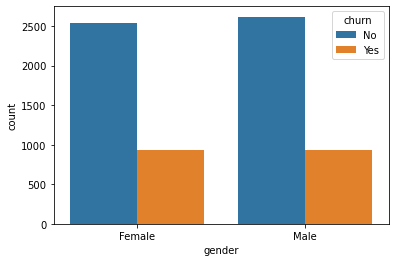

In [84]:
sns.countplot(x = 'gender', data = df, hue='churn' ); #empezamos a explorar 

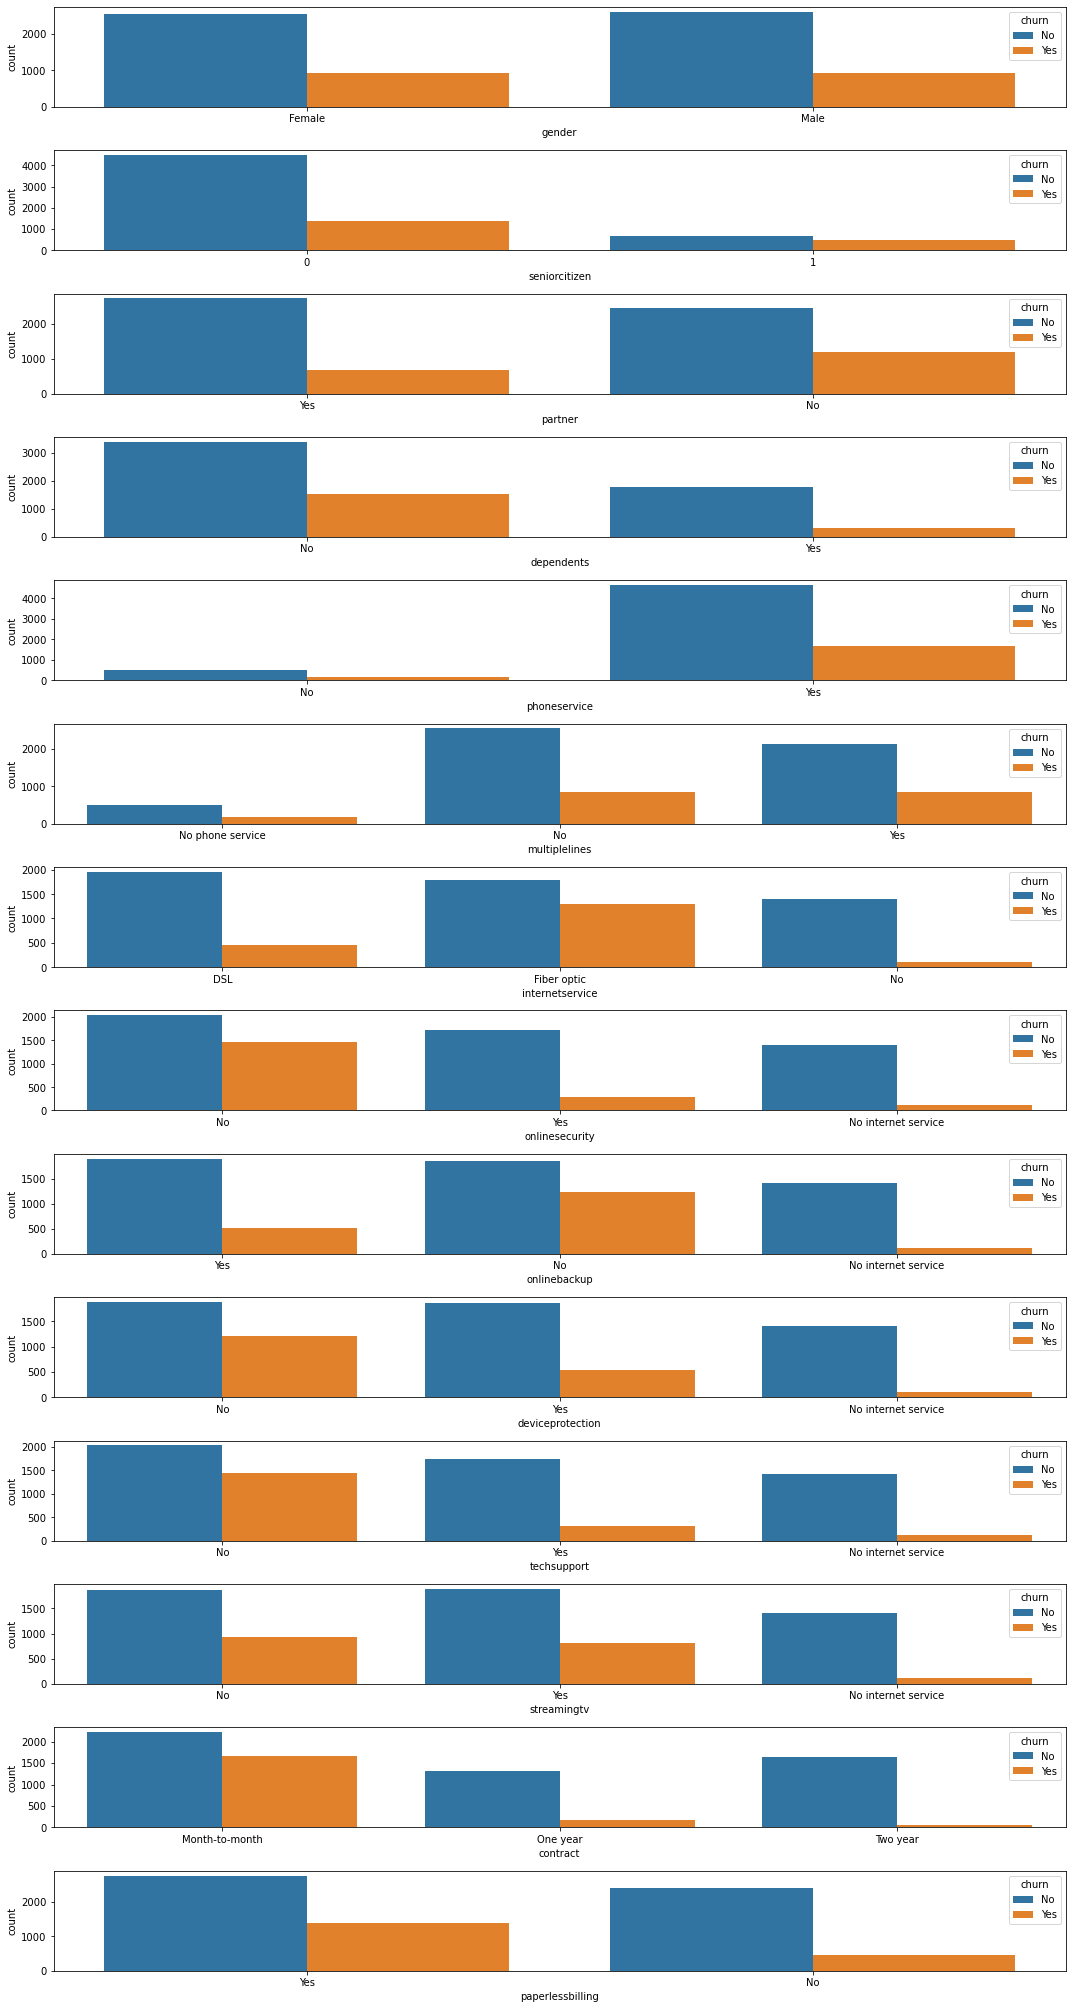

<Figure size 432x288 with 0 Axes>

In [89]:
fig, axes = plt.subplots(15, figsize=(15,30))
axes = axes.flat

for indice, columna in enumerate(categoricas.columns):
    sns.countplot(x = categoricas[columna], hue='churn', data = df, ax=axes[indice]);

plt.tight_layout()
fig.delaxes(axes[indice])
plt.show()
plt.savefig('vcategoricas.png');

Comenzamos a imaginar qué variables podrán ser asignadas con orden o sin orden.

In [86]:
df.describe(include='object').T

,count,unique,top,freq
customerid,7032,7032,7590-VHVEG,1
gender,7032,2,Male,3549
partner,7032,2,No,3639
dependents,7032,2,No,4933
phoneservice,7032,2,Yes,6352
multiplelines,7032,3,No,3385
internetservice,7032,3,Fiber optic,3096
onlinesecurity,7032,3,No,3497
onlinebackup,7032,3,No,3087
deviceprotection,7032,3,No,3094


In [87]:
df.shape

(7032, 19)

In [88]:
df.to_pickle("../archivos/telco_customer_churn.pkl") #guardamos el archivo en pickle para conservar los cambios de tipo de dato efectuados en él.